In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as wg
from IPython.display import display

<function __main__.valvePlot>

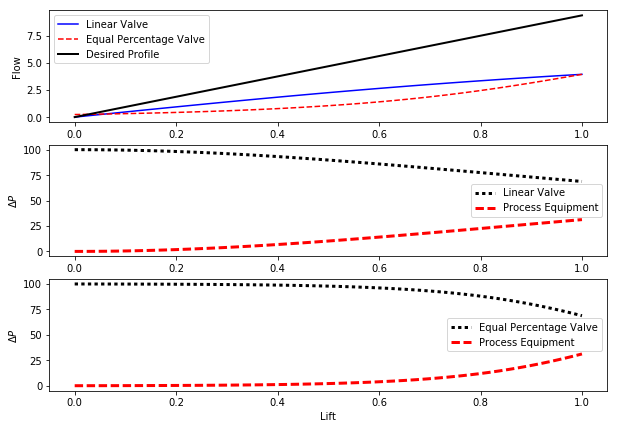

In [6]:
c1 = 2.0     # Coefficient of pressure drop across equipment  
DPt = 100    # Total pressure generated by pump (constant)
g_s = 1.1    # specific gravity of fluid

# Lift functions for two different valve trim types
# linear valve
def f_lin(x,R):
    return x             # linear valve trim
# equal percentage valve
def f_ep(x,R):
    return R**(x-1)      # equal percentage valve trim (R = 20-50)
# pressure drop across equipment (excluding valve)
def DPe(q):
    return c1 * q**2
# valve and process equipment flow with 100 bar pressure drop
def qi(x,f,Cv,R):
    return np.sqrt((Cv*f(x,R))**2*DPt / (g_s + (Cv*f(x,R))**2 * c1))

def valvePlot(R,Cv):
    lift = np.linspace(0,1)  # equally spaced points between 0 and 1
    
    # Process equipment + Valve performance
    flow_lin = qi(lift,f_lin,Cv,R)  # flow through linear valve
    flow_ep  = qi(lift,f_ep,Cv,R)   # flow through equal percentage valve

    plt.figure(1,figsize=(10,7))
    plt.title('Valve Performance - Installed')
    plt.subplot(3,1,1)
    plt.plot(lift,flow_lin,'b-',label='Linear Valve')
    plt.plot(lift,flow_ep,'r--',label='Equal Percentage Valve')
    plt.plot([0,1],[0,9.4],'k-',linewidth=2,label='Desired Profile')
    plt.legend(loc='best')
    plt.ylabel('Flow')

    plt.subplot(3,1,2)
    plt.plot(lift,DPt-DPe(flow_lin),'k:',linewidth=3)
    plt.plot(lift,DPe(flow_lin),'r--',linewidth=3)
    plt.legend(['Linear Valve','Process Equipment'],loc='best')
    plt.ylabel(r'$\Delta P$')

    plt.subplot(3,1,3)
    plt.plot(lift,DPt-DPe(flow_ep),'k:',linewidth=3)
    plt.plot(lift,DPe(flow_ep),'r--',linewidth=3)
    plt.legend(['Equal Percentage Valve','Process Equipment'],loc='best')
    plt.ylabel(r'$\Delta P$')
    plt.xlabel('Lift')
    
Cv_slide = wg.FloatSlider(value=0.5,min=0.1,max=10.0,step=0.1)
R_slide = wg.FloatSlider(value=20.0,min=20.0,max=50.0,step=1.0)
wg.interact(valvePlot, R=R_slide, Cv=Cv_slide)